#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Task 1:

In [17]:
print(f"number of rows = {len(df)}")
print(f"number of columns = {len(df.columns)}\n")

print(f"data type of each column: \n{df.dtypes}\n")

print(f"Number of missing values in each column: \n{df.isna().sum()}\n")

number of rows = 148654
number of columns = 13

data type of each column: 
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Number of missing values in each column: 
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64



# Task 2:

In [18]:
maxSalary=df['TotalPayBenefits'].max()
minSalary=df['TotalPayBenefits'].min()

print(f"Mean Salary: {df['TotalPayBenefits'].mean()}")
print(f"Median Salary: {df['TotalPayBenefits'].median()}")
print(f"Mode Salary: {df['TotalPayBenefits'].mode().iloc[0]}")
print(f"Minimum Salary: {minSalary}")
print(f"Maximum Salary: {maxSalary}")
print(f"Salary Range: {maxSalary-minSalary}")
print(f"Standard Deviation of Salary: {df['TotalPayBenefits'].std()}")

Mean Salary: 93692.55481056681
Median Salary: 92404.09
Mode Salary: 7959.18
Minimum Salary: -618.13
Maximum Salary: 567595.43
Salary Range: 568213.56
Standard Deviation of Salary: 62793.533483237705


# Task 3:

In [19]:
columnsZ=['Benefits','BasePay','OvertimePay','OtherPay']
df[columnsZ]=df[columnsZ].fillna(0)

columnsNone=['Status','Notes']
df[columnsNone]=df[columnsNone].fillna('None')

I used the 'fillna' method to fill missing values. For numeric columns, I filled missing values with '0' since it signifies that employees in those rows don't receive benefits or overtime pay. For 'Status' and 'Notes' columns, I used 'None' to indicate that there is no status or notes at the moment, but these may be updated later.

# Task 4:

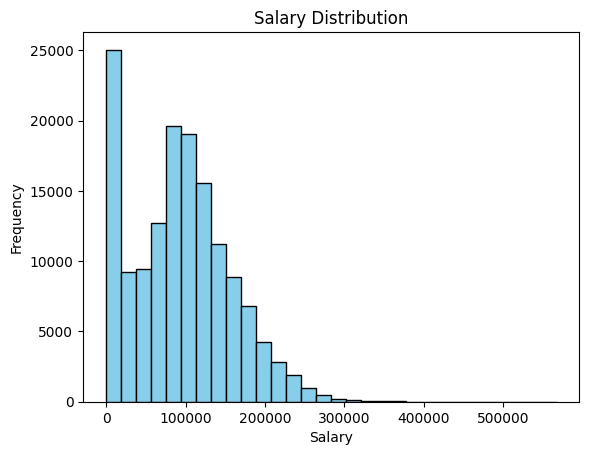

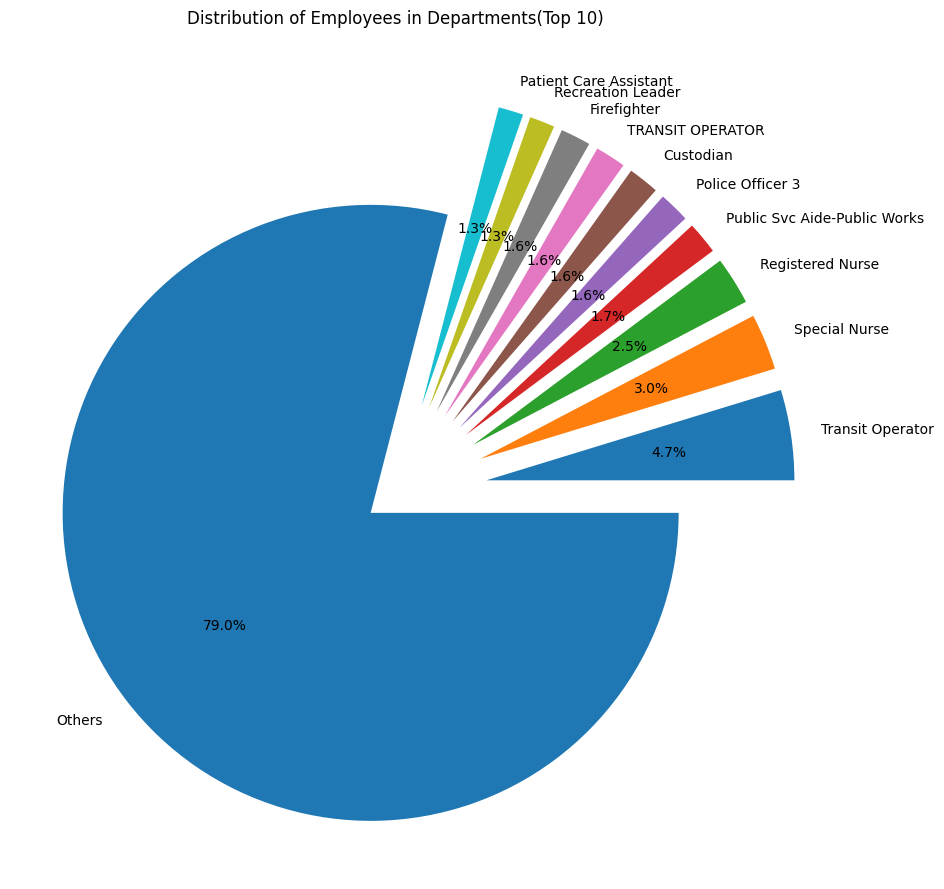

In [20]:
plt.hist(df['TotalPayBenefits'],bins=30, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

print("\n")
depCount=df['JobTitle'].value_counts();
topDep=depCount.head(10)
otherDep=depCount.iloc[10:].sum()
allDep = pd.concat([topDep,pd.Series({'Others': otherDep})])

plt.figure(figsize=(10,10))
explode_values = (0.3, 0.3, 0.3, 0.3, 0.3, 0.3,0.3,0.3,0.3,0.3,0.1)
plt.pie(allDep,labels=allDep.index,autopct='%1.1f%%', explode=explode_values)
plt.title('Distribution of Employees in Departments(Top 10)',y=1.1)
plt.show()

# Task 5:

In [21]:
grouped_data = df.groupby(['JobTitle']).agg({'TotalPayBenefits': ['mean', 'median', 'max', 'min','sum','count']}).reset_index()
grouped_data['Average'] = grouped_data[('TotalPayBenefits', 'sum')] / grouped_data[('TotalPayBenefits', 'count')]
print(grouped_data)

                                            JobTitle TotalPayBenefits  \
                                                                 mean   
0                                      ACCOUNT CLERK     44035.664337   
1                                         ACCOUNTANT     47429.268000   
2                                  ACCOUNTANT INTERN     29031.742917   
3                        ACPO,JuvP, Juv Prob (SFERS)     80266.370000   
4                                      ACUPUNCTURIST     67594.400000   
...                                              ...              ...   
2154                           X-RAY LABORATORY AIDE     52705.880385   
2155                           X-Ray Laboratory Aide     69521.123200   
2156  YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS     53632.870000   
2157                              Youth Comm Advisor     60118.550000   
2158                                     ZOO CURATOR     66686.560000   

                                                  

# Task 6:

Correlation between Salary and Base Pay: 0.9468639852010157




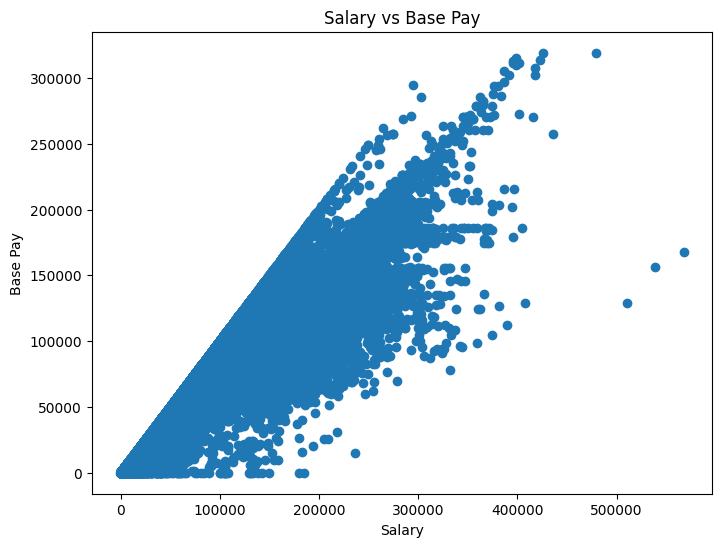

In [22]:
correlation = df['TotalPayBenefits'].corr(df['BasePay'])
print(f"Correlation between Salary and Base Pay: {correlation}\n\n")

plt.figure(figsize=(8, 6))
plt.scatter(df['TotalPayBenefits'], df['BasePay'])
plt.title('Salary vs Base Pay')
plt.xlabel('Salary')
plt.ylabel('Base Pay')
plt.show()

# Task 7:

This report analyzes salaries of employees in the company.
   
   Key Findings:  
         
         1. Salary Distribution:
             A significant proportion of employees, as revealed by
             the histogram, falls within the salary range below $100,000.
             This pattern suggests a concentration of employees in
             lower salary brackets compared to higher ranges.

         2. Diversity in Salaries:  
             The broad salary range suggests that employees within
             the organization receive different levels of salaries.
         
         3. Departmental Distribution:  
             The varied sizes of the pie chart slices highlight the
             diverse distribution of employees across different departments.
         
         4. Disparities in Average Salaries:
             The differences in average salaries suggest that there are
             disparities in remuneration across the organization,    
             with some departments having higher averages than others.    



# Good Luck!